In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_fake.shape

(23481, 5)

In [9]:
df_true.shape

(21417, 5)

In [10]:
df_merged = pd.concat([df_fake,df_true], axis = 0)

In [11]:
df_merged.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
df_merged = df_merged.sample(frac = 1)

In [13]:
df_merged.head(15)

,title,text,subject,date,class
8652,Republicans Tried To Kill The Clean Water Rul...,"On Tuesday, President Obama s Veto Pen got so...",News,"January 19, 2016",0
635,Breaking: MAJOR Action Taking Place At Trump ...,"By now, everyone knows that Donald Trump is up...",News,"August 8, 2017",0
13545,SUPREME COURT JUSTICE Goes All Creepy Predicti...,What the heck is wrong with these loony libera...,politics,"Jul 10, 2016",0
2582,U.S. judge allows Trump election commission to...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"July 24, 2017",1
8310,Jeb Bush Confronted On Why He Wanted Rubio Fo...,Jeb Bush is campaigning against Marco Rubio ...,News,"February 5, 2016",0
19477,"Italy's 5-Star Movement votes for leader, Di M...",ROME (Reuters) - Members of Italy s anti-estab...,worldnews,"September 21, 2017",1
9198,WATCH: PRESIDENT TRUMP CHANNELS Successful Dev...,WASHINGTON President Trump said on Thursday ...,politics,"Dec 14, 2017",0
3685,Trump said firing Comey relieved 'great pressu...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"May 19, 2017",1
10524,Text: Mitt Romney speech slamming Donald Trump,(Reuters) - The following is the full text of ...,politicsNews,"March 3, 2016",1
24,White House: It Wasn’t Sexist For Trump To Sl...,A backlash ensued after Donald Trump launched ...,News,"December 12, 2017",0


In [14]:
df_merged.reset_index(inplace = True)
df_merged.drop(["index"], axis = 1, inplace = True)

In [15]:
df_merged.head(15)

,title,text,subject,date,class
0,Republicans Tried To Kill The Clean Water Rul...,"On Tuesday, President Obama s Veto Pen got so...",News,"January 19, 2016",0
1,Breaking: MAJOR Action Taking Place At Trump ...,"By now, everyone knows that Donald Trump is up...",News,"August 8, 2017",0
2,SUPREME COURT JUSTICE Goes All Creepy Predicti...,What the heck is wrong with these loony libera...,politics,"Jul 10, 2016",0
3,U.S. judge allows Trump election commission to...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"July 24, 2017",1
4,Jeb Bush Confronted On Why He Wanted Rubio Fo...,Jeb Bush is campaigning against Marco Rubio ...,News,"February 5, 2016",0
5,"Italy's 5-Star Movement votes for leader, Di M...",ROME (Reuters) - Members of Italy s anti-estab...,worldnews,"September 21, 2017",1
6,WATCH: PRESIDENT TRUMP CHANNELS Successful Dev...,WASHINGTON President Trump said on Thursday ...,politics,"Dec 14, 2017",0
7,Trump said firing Comey relieved 'great pressu...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"May 19, 2017",1
8,Text: Mitt Romney speech slamming Donald Trump,(Reuters) - The following is the full text of ...,politicsNews,"March 3, 2016",1
9,White House: It Wasn’t Sexist For Trump To Sl...,A backlash ensued after Donald Trump launched ...,News,"December 12, 2017",0


In [16]:
df_merged.shape

(44898, 5)

In [17]:
manual_test_df = df_merged.tail(20)

In [18]:
manual_test_df.to_csv('manual_test_dataset.csv')

In [19]:
df_merged.drop(df_merged.tail(20).index,inplace = True)

In [20]:
df_merged.shape

(44878, 5)

In [21]:
df_merged['class'].value_counts()

0    23467
1    21411
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

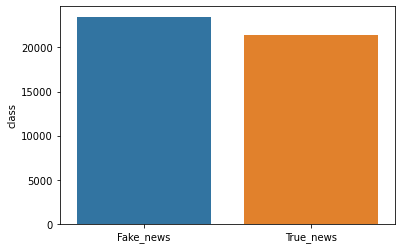

In [22]:
sns.barplot( x = ['Fake_news','True_news'] , y = df_merged['class'].value_counts())

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [24]:
stopwords = STOPWORDS

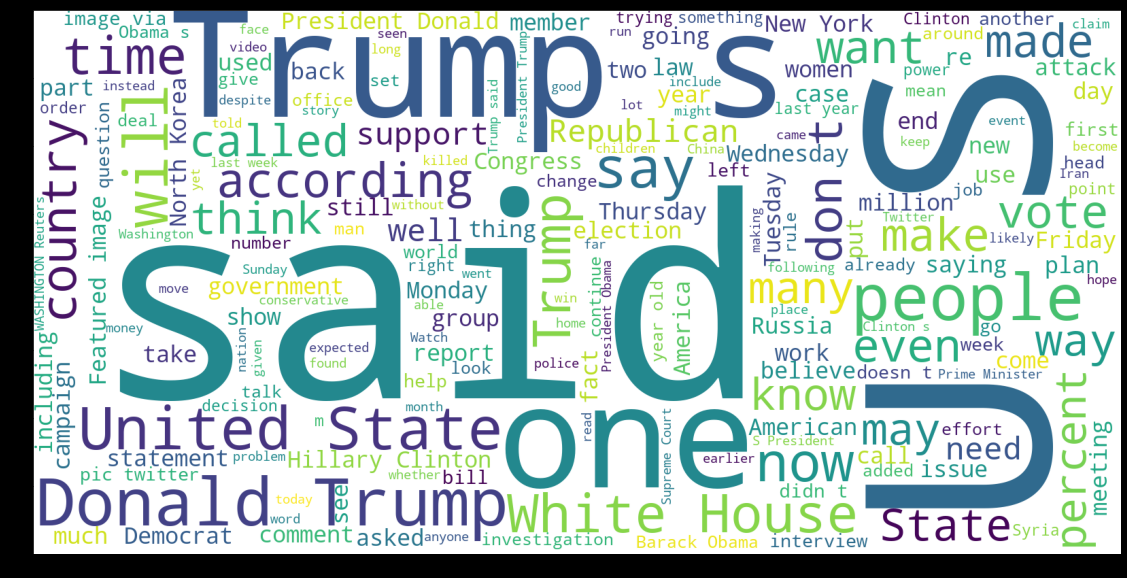

In [25]:
wc =WordCloud(background_color = 'white',stopwords = stopwords,height = 800,width = 1600)
wc.generate(''.join(df_merged['text'].tolist()))
plt.figure(figsize = (20,10),facecolor = 'k')
plt.imshow(wc)

In [26]:
wc.to_file('wordcloud_output.png')

In [48]:
df_merged1 = df_merged.loc[df_merged['class']== 1]
df_merged0 = df_merged.loc[df_merged['class']== 0]

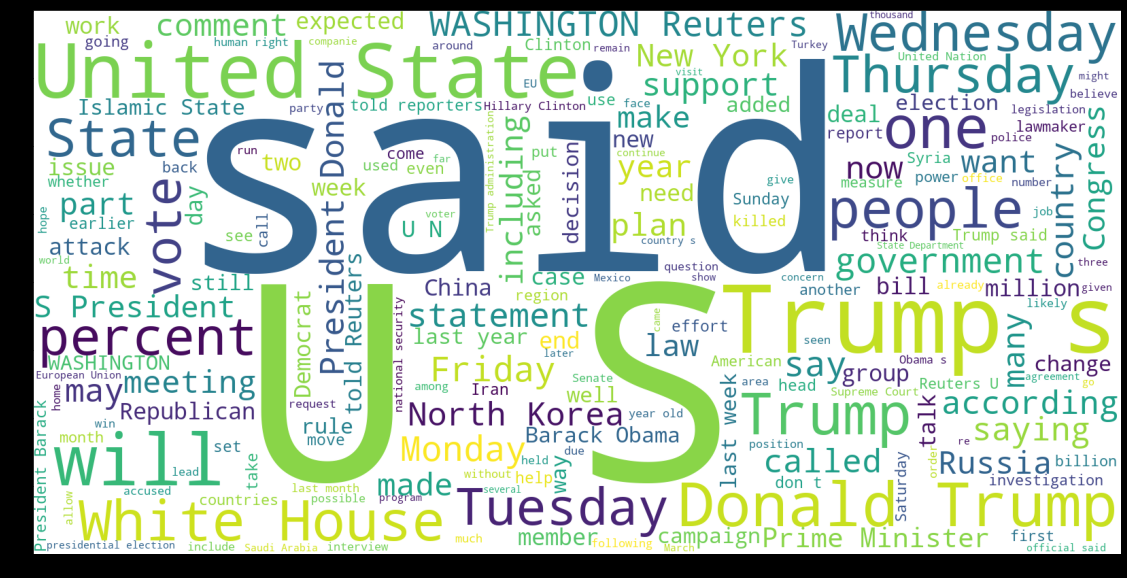

In [42]:
wc =WordCloud(background_color = 'white',stopwords = stopwords,height = 800,width = 1600)
wc.generate(''.join(df_merged1['text'].tolist()))
plt.figure(figsize = (20,10),facecolor = 'k')
plt.imshow(wc)

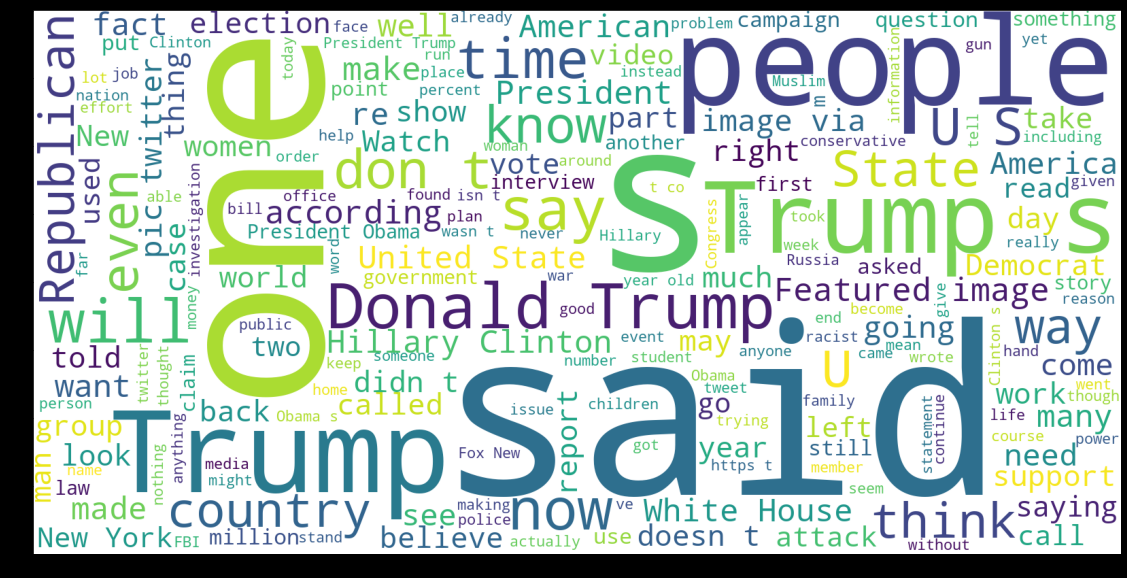

In [45]:
wc =WordCloud(background_color = 'white',stopwords = stopwords,height = 800,width = 1600)
wc.generate(''.join(df_merged0['text'].tolist()))
plt.figure(figsize = (20,10),facecolor = 'k')
plt.imshow(wc)

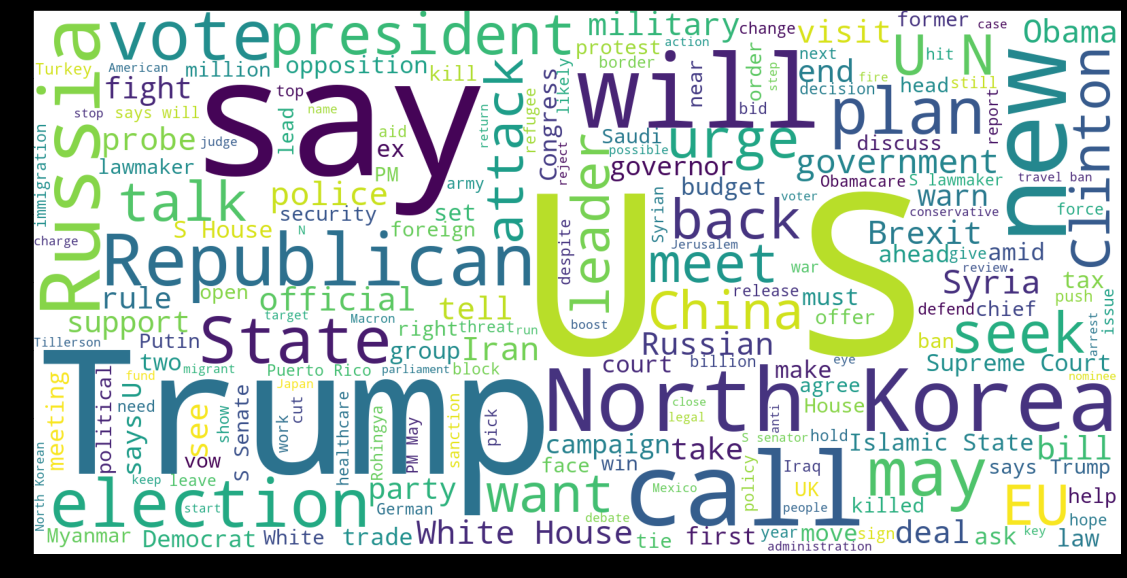

In [50]:
wc =WordCloud(background_color = 'white',stopwords = stopwords,height = 800,width = 1600)
wc.generate(''.join(df_merged1['title'].tolist()))
plt.figure(figsize = (20,10),facecolor = 'k')
plt.imshow(wc)

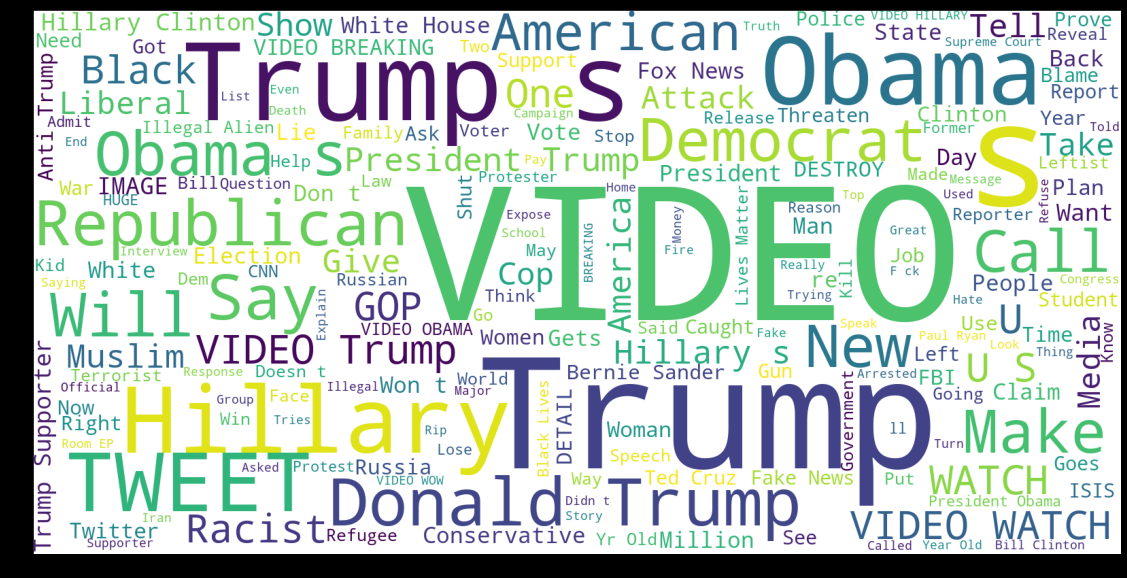

In [51]:
wc =WordCloud(background_color = 'white',stopwords = stopwords,height = 800,width = 1600)
wc.generate(''.join(df_merged0['title'].tolist()))
plt.figure(figsize = (20,10),facecolor = 'k')
plt.imshow(wc)

###### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links

In [46]:
def wordopt(text):
    text = text.lower() #change text to lower  case
    text = re.sub('\[.*?\]', '', text) #remove all regex in the square box
    text = re.sub("\\W"," ",text) #remove all non word characters  
    text = re.sub('https?://\S+|www\.\S+', '', text)#removes web addresses starting with https or www
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text) #removes all tab or new lines
    text = re.sub('\w*\d\w*', '', text)  #  
    return text

#### The tokenization stemming,and word drop application is missing from this data

In [49]:
df = df_merged.drop(["title", "subject","date"], axis = 1)

In [52]:
df["text"] = df["text"].apply(wordopt)

In [53]:
x = df["text"]
y = df["class"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

##### Convert text to vector

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test) 

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [59]:
regressor = LogisticRegression()
regressor.fit(xv_train,y_train)

LogisticRegression()

In [61]:
prediction=regressor.predict(xv_test)

In [62]:
regressor.score(xv_test, y_test)

0.9883021390374331

In [63]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4728
           1       0.99      0.99      0.99      4248

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
classifier = DecisionTreeClassifier()
classifier.fit(xv_train, y_train)

DecisionTreeClassifier()

In [66]:
pred_dt = classifier.predict(xv_test)

In [67]:
classifier.score(xv_test, y_test)

0.9949866310160428

In [68]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4728
           1       0.99      0.99      0.99      4248

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [73]:
pred_gbc = GBC.predict(xv_test)

In [74]:
GBC.score(xv_test, y_test)

0.9940953654188949

In [75]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4728
           1       0.99      1.00      0.99      4248

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Random Forest Classifier


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
pred_rfc = RFC.predict(xv_test)

In [79]:
RFC.score(xv_test, y_test)

0.9890819964349377

In [80]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4728
           1       0.99      0.99      0.99      4248

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Model Testing With Manual Entry


In [83]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = regressor.predict(new_xv_test)
    pred_DT = classifier.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [85]:
news = str(input())
manual_testing(news)

MSF says closing most cholera centers in Yemen as epidemic wanes,"GENEVA (Reuters) - The medical charity Medecins Sans Frontieres (Doctors Without Borders) is closing most of its 37 cholera treatment centers in Yemen, saying the epidemic appears to have peaked. Some 884,368 suspected cholera cases have been recorded in the war-torn country in the past six months, including 2,184 deaths, according to the latest figures from the World Health Organization (WHO). The case fatality rate is now 0.25 percent.  The number of cholera cases reported in MSF treatment centers has significantly decreased since the peak of the outbreak. As a result, the medical organization is closing the majority of its cholera treatment centers or reducing their capacity,  MSF said in a statement late on Monday. Some 567 new patients sought treatment for suspected cholera at MSF s centers in nine governorates of Yemen during the second week of October, down from 11,139 at the peak in the third week in June, it sai